<a href="https://colab.research.google.com/github/spaceacer/Aerospace-Vehicle-Design-Course-6-semester-long-SLP-/blob/main/full_AVDP_design_fromscraccht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Constants
g0 = 9.80665  # m/s²

# Create widgets for inputs
delta_v_slider = widgets.FloatSlider(value=7000, min=5000, max=12000, step=100, description='Delta V (m/s):')
Isp_slider = widgets.FloatSlider(value=450, min=200, max=500, step=10, description='Isp (seconds):')
payload_mass_slider = widgets.FloatSlider(value=200, min=50, max=10000, step=100, description='Payload Mass (kg):')
design_lambda_slider = widgets.FloatSlider(value=0.15, min=0.1, max=0.3, step=0.005, description='Design Structural Coefficient λ:')
glow_output = widgets.Output()
graph_output = widgets.Output()

# Function to update the plot based on slider values
def update_plot(delta_v, Isp, payload_mass, design_lambda):
    # Derived
    MR = np.exp(delta_v / (Isp * g0))             # Mass ratio
    zeta = (MR - 1) / MR                          # Propellant mass fraction

    # Sweep over structural coefficient (λ)
    lambda_values = np.linspace(0.01, 0.3, 500)   # Reasonable range for SSTO
    GLOW_values = []

    for lam in lambda_values:
        denominator = 1 - (zeta / (1 - lam))
        if denominator <= 0:
            GLOW = np.inf  # Not physically possible
        else:
            GLOW = payload_mass / denominator
        GLOW_values.append(GLOW)

    GLOW_values = np.array(GLOW_values)

    # Calculate GLOW for the design structural coefficient
    denominator_design = 1 - (zeta / (1 - design_lambda))
    if denominator_design <= 0:
        design_GLOW = np.inf
    else:
        design_GLOW = payload_mass / denominator_design

    # Clear previous output and display the design GLOW
    with glow_output:
        glow_output.clear_output()
        print(f"GLOW for Design Structural Coefficient (λ = {design_lambda:.3f}): {design_GLOW:.2f} kg")

    with graph_output:
        graph_output.clear_output(wait=True) # Clear and wait for new plots

        # Plotting in a 1x2 grid
        fig, axes = plt.subplots(1, 2, figsize=(14, 7)) # 1 row, 2 columns

        # Log scale plot
        axes[0].plot(lambda_values, GLOW_values, label="GLOW vs Structural Coefficient λ", color='blue')
        axes[0].axvline(x=1/MR, color='red', linestyle='--', label=f"λ_max = {1/MR:.3f}")
        axes[0].axvline(x=design_lambda, color='green', linestyle='-', label=f"Design λ = {design_lambda:.3f}")
        axes[0].set_yscale("log")
        axes[0].set_xlabel("Structural Coefficient λ")
        axes[0].set_ylabel("GLOW (kg)")
        axes[0].set_title("SSTO Vehicle Size Sensitivity to Structural Coefficient (Log Scale)")
        axes[0].grid(True, which='both', linestyle='--')
        axes[0].legend()

        # Linear scale plot
        axes[1].plot(lambda_values, GLOW_values, label="GLOW vs Structural Coefficient λ", color='blue')
        axes[1].axvline(x=1/MR, color='red', linestyle='--', label=f"λ_max = {1/MR:.3f}")
        axes[1].axvline(x=design_lambda, color='green', linestyle='-', label=f"Design λ = {design_lambda:.3f}")
        axes[1].set_yscale("linear")
        axes[1].set_ylim(0, np.max(GLOW_values[np.isfinite(GLOW_values)]) * 1.1) # Adjust y-limit for better visualization
        axes[1].set_xlabel("Structural Coefficient λ")
        axes[1].set_ylabel("GLOW (kg)")
        axes[1].set_title("SSTO Vehicle Size Sensitivity to Structural Coefficient (Linear Scale)")
        axes[1].grid(True, which='both', linestyle='--')
        axes[1].legend()

        plt.tight_layout()
        plt.show()

# Link sliders to the update function
interactive_elements = widgets.interactive(update_plot, delta_v=delta_v_slider, Isp=Isp_slider, payload_mass=payload_mass_slider, design_lambda=design_lambda_slider)

# Arrange widgets in a layout: Sliders on the left, outputs (text and graphs) on the right
sliders_box = widgets.VBox([delta_v_slider, Isp_slider, payload_mass_slider, design_lambda_slider])
output_box = widgets.VBox([glow_output, graph_output]) # Stack text output and graph output vertically
hbox_layout = widgets.HBox([sliders_box, output_box]) # Arrange sliders and the stacked output box horizontally

display(hbox_layout)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Constants
g0 = 9.80665  # Standard gravity in m/s²

# --- Widgets ---
delta_v_slider = widgets.FloatSlider(value=7000, min=5000, max=12000, step=100, description='Delta V (m/s):')
Isp_slider = widgets.FloatSlider(value=450, min=200, max=500, step=10, description='Isp (s):')
payload_mass_slider = widgets.FloatSlider(value=200, min=50, max=10000, step=100, description='Payload Mass (kg):')
design_lambda_slider = widgets.FloatSlider(value=0.15, min=0.05, max=0.3, step=0.005, description='Design λ:')

glow_output = widgets.Output()
graph_output = widgets.Output()

# --- Update Function ---
def update_plot(delta_v, Isp, payload_mass, design_lambda):
    # --- Derived quantities ---
    MR = np.exp(delta_v / (Isp * g0))     # Mass Ratio
    zeta = (MR - 1) / MR                  # Propellant mass fraction
    lambda_max = 1 / MR                   # Max feasible structural coefficient

    # --- Sweep over λ ---
    lambda_values = np.linspace(0.01, 0.3, 500)
    GLOW_values = []

    for lam in lambda_values:
        denom = 1 - (zeta / (1 - lam))
        GLOW = np.inf if denom <= 0 else payload_mass / denom
        GLOW_values.append(GLOW)

    GLOW_values = np.array(GLOW_values)

    # --- Design GLOW ---
    denom_design = 1 - (zeta / (1 - design_lambda))
    design_GLOW = np.inf if denom_design <= 0 else payload_mass / denom_design
    payload_fraction = payload_mass / design_GLOW if np.isfinite(design_GLOW) else 0

    # Calculate structural mass and propellant mass for the design lambda
    if np.isfinite(design_GLOW):
        structural_mass = design_lambda * design_GLOW
        propellant_mass = design_GLOW - structural_mass - payload_mass
    else:
        structural_mass = np.inf
        propellant_mass = np.inf


    # --- Text Output ---
    with glow_output:
        glow_output.clear_output()
        print("🚀 SSTO Design Report")
        print(f"----------------------------")
        print(f"Delta-v                : {delta_v:.0f} m/s")
        print(f"Specific Impulse (Isp) : {Isp:.0f} s")
        print(f"Payload Mass           : {payload_mass:.1f} kg")
        print(f"Mass Ratio (MR)        : {MR:.3f}")
        print(f"Propellant Fraction ζ  : {zeta:.4f}")
        print(f"λₘₐₓ (Feasibility Limit): {lambda_max:.4f}")
        print(f"Design λ               : {design_lambda:.4f}")
        print(f"GLOW @ Design λ        : {design_GLOW:.2f} kg")
        print(f"Structural Mass        : {structural_mass:.2f} kg")
        print(f"Propellant Mass        : {propellant_mass:.2f} kg")
        print(f"Payload Fraction       : {payload_fraction:.4f}")
        if design_lambda >= lambda_max:
            print("⚠️ SSTO not feasible: λ exceeds λₘₐₓ")

    # --- Plot Output ---
    with graph_output:
        graph_output.clear_output(wait=True)
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Log Scale
        axes[0].plot(lambda_values, GLOW_values, color='blue', label="GLOW vs λ")
        axes[0].axvline(lambda_max, color='red', linestyle='--', label=f"λₘₐₓ = {lambda_max:.3f}")
        axes[0].axvline(design_lambda, color='green', linestyle='-', label=f"Design λ = {design_lambda:.3f}")
        axes[0].set_yscale("log")
        axes[0].set_xlabel("Structural Coefficient λ")
        axes[0].set_ylabel("GLOW (kg)")
        axes[0].set_title("SSTO GLOW vs λ (Log Scale)")
        axes[0].grid(True, which='both', linestyle='--')
        axes[0].legend()

        # Linear Scale
        axes[1].plot(lambda_values, GLOW_values, color='blue', label="GLOW vs λ")
        axes[1].axvline(lambda_max, color='red', linestyle='--', label=f"λₘₐₓ = {lambda_max:.3f}")
        axes[1].axvline(design_lambda, color='green', linestyle='-', label=f"Design λ = {design_lambda:.3f}")
        axes[1].set_xlabel("Structural Coefficient λ")
        axes[1].set_ylabel("GLOW (kg)")
        axes[1].set_ylim(0, 10000) #np.nanmax(GLOW_values[np.isfinite(GLOW_values)]) * 0.01)
        axes[1].set_title("SSTO GLOW vs λ (Linear Scale)")
        axes[1].grid(True, which='both', linestyle='--')
        axes[1].legend()
        axes[1].set_xlim(0, lambda_max)# - 0.05) # Set x-limit

        plt.tight_layout()
        plt.show()

# --- Widget Linking ---
interactive_elements = widgets.interactive(
    update_plot,
    delta_v=delta_v_slider,
    Isp=Isp_slider,
    payload_mass=payload_mass_slider,
    design_lambda=design_lambda_slider
)

# --- Layout ---
sliders_box = widgets.VBox([
    delta_v_slider, Isp_slider, payload_mass_slider, design_lambda_slider
])
output_box = widgets.HBox([glow_output, graph_output]) # Changed to HBox
ui_layout = widgets.HBox([sliders_box, output_box])

# --- Display ---
display(ui_layout)

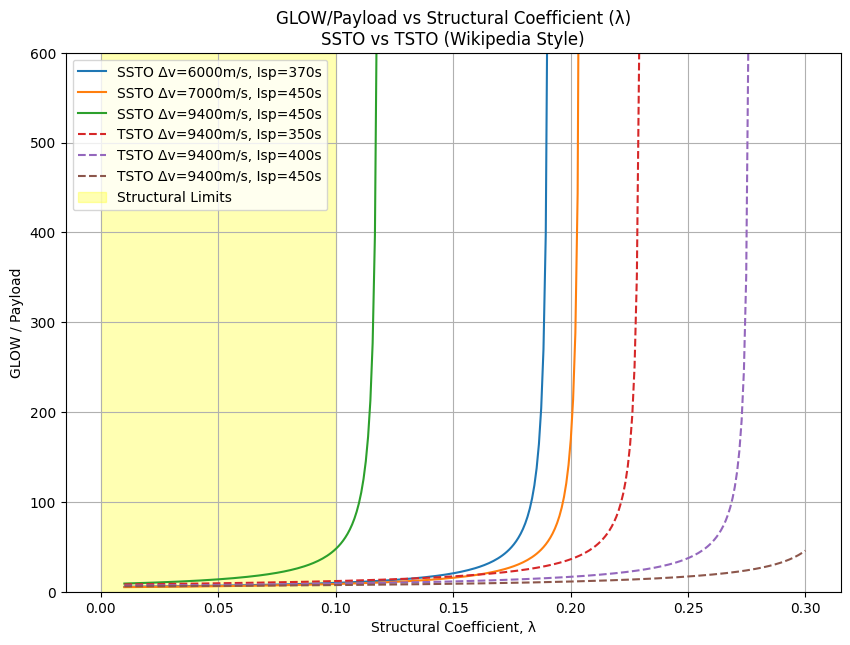

In [ ]:
## SSTO V/S TSTO

import numpy as np
import matplotlib.pyplot as plt

# Parameters
payload_mass = 1000  # kg
#delta_v_total = 9400  # m/s # This will now be iterated over
g0 = 9.81  # m/s^2
Isp_values = [350, 400, 450]
lambda_vals = np.linspace(0.01, 0.3, 300)

# Delta-v split for TSTO (fractional)
dv_split = [0.536, 0.464]

# Define different delta-v values for SSTO
ssto_delta_v_configs = [
    {"delta_v": 6000, "Isp": 370},
    {"delta_v": 7000, "Isp": 450},
    {"delta_v": 9400, "Isp": 450} # Keep the original for comparison
]


def mass_ratio(delta_v, Isp):
    return np.exp(delta_v / (Isp * g0))

def glow_ssto(payload, delta_v, Isp, lambda_vals):
    MR = mass_ratio(delta_v, Isp)
    denom = 1 - ((MR - 1) / MR) / (1 - lambda_vals)
    GLOW = np.where(denom > 0, payload / denom, np.nan)
    return GLOW

def glow_tsto(payload, delta_v, Isp, lambda_vals, dv_split):
    dv1, dv2 = delta_v * dv_split[0], delta_v * dv_split[1]
    MR1 = mass_ratio(dv1, Isp)
    MR2 = mass_ratio(dv2, Isp)
    denom1 = 1 - ((MR1 - 1) / MR1) / (1 - lambda_vals)
    denom2 = 1 - ((MR2 - 1) / MR2) / (1 - lambda_vals)
    GLOW1 = np.where(denom1 > 0, payload / denom1, np.nan)
    GLOW2 = np.where(denom2 > 0, payload / denom2, np.nan)
    return GLOW1 + GLOW2

plt.figure(figsize=(10, 7))

# Plot SSTO for different delta-v and Isp configurations
for config in ssto_delta_v_configs:
    delta_v = config["delta_v"]
    Isp = config["Isp"]
    glow_s = glow_ssto(payload_mass, delta_v, Isp, lambda_vals)
    plt.plot(lambda_vals, glow_s/payload_mass, label=f'SSTO Δv={delta_v}m/s, Isp={Isp}s')


# Plot TSTO (keeping the original logic and parameters)
delta_v_total_tsto = 9400 # Use the original total delta-v for TSTO comparison
for Isp in Isp_values:
    glow_t = glow_tsto(payload_mass, delta_v_total_tsto, Isp, lambda_vals, dv_split)
    plt.plot(lambda_vals, glow_t/payload_mass, linestyle='dashed', label=f'TSTO Δv={delta_v_total_tsto}m/s, Isp={Isp}s')


plt.axvspan(0, 0.1, color='yellow', alpha=0.3, label='Structural Limits')
plt.xlabel('Structural Coefficient, λ')
plt.ylabel('GLOW / Payload')
plt.title('GLOW/Payload vs Structural Coefficient (λ)\nSSTO vs TSTO (Wikipedia Style)')
plt.legend()
plt.grid(True)
plt.ylim(0, 600)
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Gravity constant
g0 = 9.81  # m/s²

# Mass solver function: computes total stage mass needed to lift "mass_above"
def solve_stage_mass(dv, Isp, f_dry, mass_above):
    def equation(m0):
        m_dry = f_dry * m0
        m_final = m_dry + mass_above
        return dv - Isp * g0 * np.log(m0 / m_final)
    m_guess = mass_above * 5
    return fsolve(equation, m_guess)[0]

# Main plotting function
def plot_tsto(Isp1=300, Isp2=340, f_dry1=0.08, f_dry2=0.10, payload_mass=300, delta_v_total=9400):
    dv1_range = np.linspace(2000, delta_v_total - 2000, 500)
    total_mass_list = []
    dv2_list = []

    for dv1 in dv1_range:
        dv2 = delta_v_total - dv1
        dv2_list.append(dv2)

        # Stage 2: lifts payload only
        m2_total = solve_stage_mass(dv2, Isp2, f_dry2, payload_mass)
        m2_dry = f_dry2 * m2_total
        m2_prop = m2_total - m2_dry

        # Stage 1: lifts stage 2 + payload
        m1_total = solve_stage_mass(dv1, Isp1, f_dry1, m2_total + payload_mass)
        m1_dry = f_dry1 * m1_total
        m1_prop = m1_total - m1_dry

        # Final total launch mass
        total_mass = m1_dry + m1_prop + m2_dry + m2_prop + payload_mass
        total_mass_list.append(total_mass)

    # Find optimum
    min_idx = np.argmin(total_mass_list)
    opt_dv1 = dv1_range[min_idx]
    opt_dv2 = dv2_list[min_idx]

    # Mass breakdown at optimum
    m2_total = solve_stage_mass(opt_dv2, Isp2, f_dry2, payload_mass)
    m2_dry = f_dry2 * m2_total
    m2_prop = m2_total - m2_dry

    m1_total = solve_stage_mass(opt_dv1, Isp1, f_dry1, m2_total + payload_mass)
    m1_dry = f_dry1 * m1_total
    m1_prop = m1_total - m1_dry

    total_mass = m1_dry + m1_prop + m2_dry + m2_prop + payload_mass

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(dv1_range, total_mass_list, label='Total Launch Mass (kg)', color='purple')
    plt.axvline(opt_dv1, linestyle='--', color='gray', label=f'Optimal Δv₁ = {opt_dv1:.0f} m/s')
    plt.scatter(opt_dv1, total_mass, color='red')
    plt.xlabel('Stage 1 Δv (m/s)')
    plt.ylabel('Total Launch Mass (kg)')
    plt.title('TSTO Optimal Δv Split')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Output results
    print(f"🚀 Optimal Δv Split:")
    print(f"  Stage 1 Δv           : {opt_dv1:.1f} m/s")
    print(f"  Stage 2 Δv           : {opt_dv2:.1f} m/s")
    print(f"  Total Launch Mass    : {total_mass:.2f} kg")

    print("\n📦 Stage Mass Breakdown:")
    print(f"Stage 1 Own Mass       : {m1_total:.2f} kg")
    print(f"  ├─ Dry Mass          : {m1_dry:.2f} kg")
    print(f"  └─ Propellant Mass   : {m1_prop:.2f} kg")
    print(f"Stage 2 Own Mass       : {m2_total:.2f} kg")
    print(f"  ├─ Dry Mass          : {m2_dry:.2f} kg")
    print(f"  └─ Propellant Mass   : {m2_prop:.2f} kg")
    print(f"Payload                : {payload_mass:.2f} kg")

    print("\n🔩 Structural Coefficients:")
    print(f"  Stage 1: {f_dry1:.4f}")
    print(f"  Stage 2: {f_dry2:.4f}")

# Interactive UI
interact(
    plot_tsto,
    Isp1=FloatSlider(min=200, max=450, step=5, value=370, description='Isp1 (s)'),
    Isp2=FloatSlider(min=200, max=450, step=5, value=370, description='Isp2 (s)'),
    f_dry1=FloatSlider(min=0.05, max=0.25, step=0.01, value=0.0927, description='DryFrac1', readout_format = '.4f'),
    f_dry2=FloatSlider(min=0.05, max=0.25, step=0.01, value=0.1163, description='DryFrac2', readout_format = '.4f'),
    payload_mass=FloatSlider(min=10, max=1000, step=10, value=300, description='Payload (kg)'),
    delta_v_total=FloatSlider(min=6000, max=10500, step=100, value=7727.4, description='Δv Total (m/s)', readout_format = '.3f')
)


interactive(children=(FloatSlider(value=370.0, description='Isp1 (s)', max=450.0, min=200.0, step=5.0), FloatS…

<function __main__.plot_tsto(Isp1=300, Isp2=340, f_dry1=0.08, f_dry2=0.1, payload_mass=300, delta_v_total=9400)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

g0 = 9.80665  # m/s²
rho0 = 1.225  # kg/m³, sea level
H = 8500      # scale height, m

# --- Gravity & Drag Loss Estimation ---
def estimate_drag_loss(altitude, velocity):
    rho = rho0 * np.exp(-altitude / H)
    drag_loss = 0.5 * rho * velocity**2 * 0.00002  # scaled down factor
    return min(drag_loss, 200)

def estimate_gravity_loss(altitude, velocity):
    if velocity < 100:
        return 1200
    pitch_angle_deg = max(10, 90 - velocity / 20)  # estimate pitch from velocity
    burn_time = 200  # sec, assumed
    return min(g0 * burn_time * np.sin(np.radians(pitch_angle_deg)) * 0.5, 800)

# --- SSTO Mass Model ---
def compute_stage(p, isp, dv, lam):
    ve = isp * g0
    MR = np.exp(dv / ve)
    zeta = 1 - 1 / MR
    lam_max = zeta
    if lam >= lam_max:
        return {
            "error": f"λ = {lam:.4f} is not feasible. Max λ = {lam_max:.4f} for Δv = {dv:.0f} m/s and Isp = {isp:.0f} s."
        }
    denom = (1 - lam - zeta)
    if denom <= 0:
        return {
            "error": f"Denominator ≤ 0. Adjust λ or Isp. Try λ < {lam_max:.4f}"
        }
    glow = p / denom
    ms = lam * glow
    mp = zeta * glow
    return {
        "Payload Mass": p,
        "Delta-v (m/s)": dv,
        "Isp (s)": isp,
        "Mass Ratio": MR,
        "Propellant Fraction ζ": zeta,
        "λ_max": lam_max,
        "Design λ": lam,
        "GLOW": glow,
        "Structural Mass": ms,
        "Propellant Mass": mp,
        "Payload Fraction": p / glow,
    }

# --- Interactive Function ---
def update(p=200.0, isp=450.0, base_dv=7000.0, lam=0.15, altitude_km=20.0, velocity=600.0):
    alt = altitude_km * 1000  # m
    g_loss = estimate_gravity_loss(alt, velocity)
    d_loss = estimate_drag_loss(alt, velocity)
    total_dv = base_dv + g_loss + d_loss

    result = compute_stage(p, isp, total_dv, lam)
    if "error" in result:
        print(result["error"])
        return

    print(f"\n--- Stage Starting at {altitude_km:.1f} km, {velocity:.0f} m/s ---")
    print(f"Base Orbital Δv        : {base_dv:.0f} m/s")
    print(f"Estimated Gravity Loss : {g_loss:.1f} m/s")
    print(f"Estimated Drag Loss    : {d_loss:.1f} m/s")
    print(f"Total Δv Required      : {total_dv:.1f} m/s")
    print(f"Mass Ratio             : {result['Mass Ratio']:.3f}")
    print(f"λₘₐₓ (Feasibility Limit): {result['λ_max']:.4f}")
    print(f"Design λ               : {result['Design λ']:.4f}")
    print(f"GLOW                   : {result['GLOW']:.2f} kg")
    print(f"Structural Mass        : {result['Structural Mass']:.2f} kg")
    print(f"Propellant Mass        : {result['Propellant Mass']:.2f} kg")
    print(f"Payload Fraction       : {result['Payload Fraction']:.4f}")

# --- Sliders ---
interact(
    update,
    p=FloatSlider(min=10, max=2000, step=10, value=200.0, description="Payload (kg)"),
    isp=FloatSlider(min=250, max=470, step=5, value=450.0, description="Isp (s)"),
    base_dv=FloatSlider(min=6500, max=9500, step=100, value=7000.0, description="Δv to Orbit (m/s)"),
    lam=FloatSlider(min=0.05, max=0.30, step=0.005, value=0.15, description="λ (Struct.)"),
    altitude_km=FloatSlider(min=10, max=40, step=1, value=20.0, description="Start Alt (km)"),
    velocity=FloatSlider(min=100, max=2000, step=50, value=600.0, description="Start Speed (m/s)")
)


interactive(children=(FloatSlider(value=200.0, description='Payload (kg)', max=2000.0, min=10.0, step=10.0), F…

<function __main__.update(p=200.0, isp=450.0, base_dv=7000.0, lam=0.15, altitude_km=20.0, velocity=600.0)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, HBox, VBox, Output, Label

g0 = 9.80665  # m/s²
rho0 = 1.225  # Sea-level density
H = 8500      # Scale height (m)
Cd = 0.5      # Assumed drag coefficient
A = 1.0       # Reference area in m² (assume 1 m² frontal area)

def atmospheric_density(h):
    return rho0 * np.exp(-h / H)

def gravity_loss(trajectory):
    # Calculate gravity loss as the integral of g*sin(flight path angle) over time
    # Approximating sin(gamma) as constant over small dt intervals in the simulation
    return sum(g0 * np.sin(np.radians(gamma)) * dt for _, _, _, gamma, dt in trajectory)


def drag_force(rho, v):
    return 0.5 * rho * Cd * A * v**2

def simulate_trajectory(h0, v0, burn_time, thrust, mass, mdot):
    dt = 0.1
    time = 0
    h, v, gamma = h0, v0, 90  # Start with vertical ascent assumption
    trajectory = []
    while time < burn_time:
        rho = atmospheric_density(h)
        D = drag_force(rho, v)
        g = g0 # Assume constant gravity for simplicity in simulation
        a = (thrust - D - mass * g * np.sin(np.radians(gamma))) / mass # Include gravity component based on flight path angle

        # Simple update for illustration, a real simulation would be more complex
        v_horizontal = v * np.cos(np.radians(gamma))
        v_vertical = v * np.sin(np.radians(gamma))

        v_vertical += a * dt # Apply acceleration to vertical velocity
        v = np.sqrt(v_horizontal**2 + v_vertical**2)
        gamma = np.degrees(np.arctan2(v_vertical, v_horizontal)) # Update flight path angle

        h += v_vertical * dt
        trajectory.append((time, h, v, gamma, dt))
        mass -= mdot * dt
        time += dt
        if mass <= 0: # Stop if fuel runs out
             break
    return trajectory

def compute_stage_with_losses(p, isp, dv, lam, h0, v0):
    ve = isp * g0
    MR = np.exp(dv / ve)
    zeta = 1 - 1 / MR
    lam_max = zeta
    if lam >= lam_max:
        return {
            "error": f"λ = {lam:.4f} is not feasible. Max λ = {lam_max:.4f} for Δv = {dv:.0f} m/s and Isp = {isp:.0f} s."
        }
    denom = (1 - lam - zeta)
    if denom <= 0:
        return {
            "error": f"Denominator ≤ 0. Adjust λ or Isp. Try λ < {lam_max:.4f}"
        }
    glow = p / denom
    ms = lam * glow
    mp = zeta * glow
    thrust = 1.5 * glow * g0  # Assume T/W = 1.5
    burn_time = ve * mp / thrust
    mdot = thrust / ve

    # Check if burn time is realistic, prevent very short or zero burn times
    if burn_time <= 0.1:
         return {"error": "Calculated burn time is too short or zero. Adjust parameters."}


    trajectory = simulate_trajectory(h0, v0, burn_time, thrust, glow, mdot)

    if not trajectory:
         return {"error": "Trajectory simulation failed or was too short."}


    g_loss = gravity_loss(trajectory)
    # More accurate drag loss calculation: Integrate drag force / mass over time
    drag_loss_integral = 0
    current_mass = glow
    for (_, h, v, _, dt) in trajectory:
        rho = atmospheric_density(h)
        D = drag_force(rho, v)
        # Avoid division by zero or near zero mass
        if current_mass > 0.1:
            drag_loss_integral += (D / current_mass) * dt
        current_mass -= mdot * dt
    d_loss = drag_loss_integral

    dv_required = dv + g_loss + d_loss

    return {
        "Payload Mass": p,
        "Delta-v (m/s)": dv,
        "Isp (s)": isp,
        "Mass Ratio": MR,
        "Propellant Fraction ζ": zeta,
        "λ_max": lam_max,
        "Design λ": lam,
        "GLOW": glow,
        "Structural Mass": ms,
        "Propellant Mass": mp,
        "Payload Fraction": p / glow,
        "Gravity Loss (m/s)": g_loss,
        "Drag Loss (m/s)": d_loss,
        "Total Required Δv (m/s)": dv_required,
        "trajectory": trajectory
    }

# Output widgets
text_output = Output()
plot_output = Output()

def update(p=200.0, isp=450.0, dv=7000.0, lam=0.15, h0=20000, v0=600):
    text_output.clear_output()
    plot_output.clear_output()

    result = compute_stage_with_losses(p, isp, dv, lam, h0, v0)
    with text_output:
        if "error" in result:
            print("Error:", result["error"])
            return
        print("🚀 SSTO Design Report (with estimated losses)")
        print("-" * 40)
        for k, v in result.items():
            if k not in ["trajectory", "Gravity Loss (m/s)", "Drag Loss (m/s)", "Total Required Δv (m/s)"]:
                if isinstance(v, float):
                    print(f"{k:<30}: {v:.2f}")
                else:
                    print(f"{k:<30}: {v}")
        print("-" * 40)
        print(f"{'Estimated Gravity Loss (m/s)':<30}: {result['Gravity Loss (m/s)']:.2f}")
        print(f"{'Estimated Drag Loss (m/s)':<30}: {result['Drag Loss (m/s)']:.2f}")
        print(f"{'Total Required Δv (m/s)':<30}: {result['Total Required Δv (m/s)']:.2f}")


    with plot_output:
        trajectory = result.get("trajectory")
        if trajectory:
            time = [t for t, _, _, _, _ in trajectory]
            alt = [h / 1000 for _, h, _, _, _ in trajectory]
            vel = [v for _, _, v, _, _ in trajectory]

            fig, ax1 = plt.subplots(figsize=(6, 4))
            ax2 = ax1.twinx()
            ax1.plot(time, alt, 'b-', label='Altitude (km)')
            ax2.plot(time, vel, 'r--', label='Velocity (m/s)')
            ax1.set_xlabel('Time (s)')
            ax1.set_ylabel('Altitude (km)', color='b')
            ax2.set_ylabel('Velocity (m/s)', color='r')
            fig.suptitle('Simulated Trajectory (Vertical Ascent Model)', fontsize=10)
            fig.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
            # Add legends to the plot
            lines, labels = ax1.get_legend_handles_labels()
            lines2, labels2 = ax2.get_legend_handles_labels()
            ax2.legend(lines + lines2, labels + labels2, loc='upper left')

            plt.grid(True)
            plt.show()
        else:
            print("No trajectory data to plot.")


sliders = VBox([
    Label("Input Parameters:"),
    FloatSlider(min=10, max=2000, step=10, value=200.0, description="Payload (kg)"),
    FloatSlider(min=250, max=470, step=5, value=450.0, description="Isp (s)"),
    FloatSlider(min=6500, max=9500, step=100, value=7000.0, description="Δv (m/s)"),
    FloatSlider(min=0.05, max=0.30, step=0.005, value=0.15, description="λ (Struct.)"),
    FloatSlider(min=10000, max=30000, step=500, value=20000, description="Start Alt (m)"),
    FloatSlider(min=100, max=1500, step=50, value=600, description="Start Vel (m/s)")
])

# Arrange sliders and outputs in the desired layout
left_box = VBox([sliders])
center_box = VBox([text_output])
right_box = VBox([plot_output])
interact_ui = HBox([left_box, center_box, right_box])


# Link the interact function to the sliders but don't display the default interact output
interact(update,
         p=sliders.children[1],
         isp=sliders.children[2],
         dv=sliders.children[3],
         lam=sliders.children[4],
         h0=sliders.children[5],
         v0=sliders.children[6])

# Display the custom arranged HBox
display(interact_ui)

interactive(children=(FloatSlider(value=200.0, description='Payload (kg)', max=2000.0, min=10.0, step=10.0), F…

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Supersonic CL function
def compute_cl(alpha_deg, mach):
    alpha_rad = np.radians(alpha_deg)
    if mach <= 1:
        return 0  # Outside valid regime
    return (4 * alpha_rad) / np.sqrt(mach**2 - 1)

# Interactive plot
def plot_cl_vs_alpha(mach=2.0):
    alpha_range = np.linspace(0, 10, 200)  # degrees
    cl_values = [compute_cl(alpha, mach) for alpha in alpha_range]

    plt.figure(figsize=(8, 5))
    plt.plot(alpha_range, cl_values, label=f'Mach = {mach:.2f}')
    plt.xlabel("Angle of Attack (degrees)")
    plt.ylabel("Lift Coefficient (C_L)")
    plt.title("C_L vs AoA for Supersonic Flat Plate Airfoil")
    plt.grid(True)
    plt.legend()
    plt.show()

# Slider to vary Mach number
interact(plot_cl_vs_alpha,
         mach=FloatSlider(value=2.0, min=1.2, max=5.0, step=0.1, description='Mach Number'))


interactive(children=(FloatSlider(value=2.0, description='Mach Number', max=5.0, min=1.2), Output()), _dom_cla…

<function __main__.plot_cl_vs_alpha(mach=2.0)>

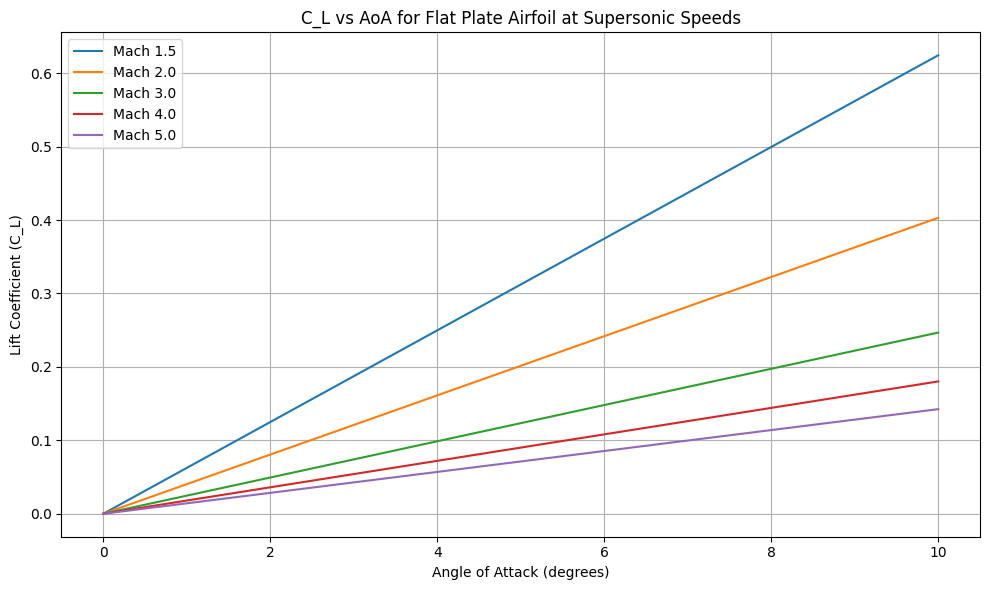

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Supersonic CL calculation
def compute_cl(alpha_deg, mach):
    alpha_rad = np.radians(alpha_deg)
    if mach <= 1:
        return 0
    return (4 * alpha_rad) / np.sqrt(mach**2 - 1)

# AoA range
alpha_range = np.linspace(0, 10, 200)

# Mach numbers to plot
mach_numbers = [1.5, 2.0, 3.0, 4.0, 5.0]

# Plot
plt.figure(figsize=(10, 6))

for mach in mach_numbers:
    cl_values = [compute_cl(alpha, mach) for alpha in alpha_range]
    plt.plot(alpha_range, cl_values, label=f"Mach {mach}")

plt.xlabel("Angle of Attack (degrees)")
plt.ylabel("Lift Coefficient (C_L)")
plt.title("C_L vs AoA for Flat Plate Airfoil at Supersonic Speeds")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox
from scipy.constants import R, g

# Constants
gamma = 1.4
R_air = 287.05  # J/kg·K
C_D0 = 0.02
e = 0.8

# Standard Atmosphere (simplified)
def get_density(altitude_km):
    altitude = altitude_km * 1000
    if altitude < 11000:
        T = 288.15 - 0.0065 * altitude
        p = 101325 * (T / 288.15) ** (-g / (-0.0065 * R_air))
    else:
        T = 216.65
        p = 22632 * np.exp(-g * (altitude - 11000) / (R_air * T))
    rho = p / (R_air * T)
    return rho, T

# CL and CD calculation
def compute_cl(alpha_deg, mach):
    alpha_rad = np.radians(alpha_deg)
    if mach <= 1:
        return 0
    return (4 * alpha_rad) / np.sqrt(mach**2 - 1)

def compute_cd(cl, AR):
    return C_D0 + (cl**2) / (np.pi * e * AR)

# Lift and Drag
def aerodynamics(alpha_deg, mach, wing_area, altitude_km, AR):
    rho, T = get_density(altitude_km)
    a = np.sqrt(gamma * R_air * T)        # Speed of sound
    V = mach * a                          # Velocity
    cl = compute_cl(alpha_deg, mach)
    cd = compute_cd(cl, AR)
    q = 0.5 * rho * V**2                  # Dynamic pressure
    L = q * wing_area * cl
    D = q * wing_area * cd

    # Plot
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.bar(["Lift", "Drag"], [L, D], color=["skyblue", "salmon"])
    ax.set_ylabel("Force (N)")
    ax.set_title("Lift and Drag Forces")
    ax.grid(True)
    plt.show()

    # Print outputs
    print(f"--- Conditions ---")
    print(f"Altitude: {altitude_km} km → ρ = {rho:.3f} kg/m³, T = {T:.1f} K")
    print(f"Mach {mach} → V = {V:.1f} m/s")
    print(f"AoA = {alpha_deg}°, CL = {cl:.3f}, CD = {cd:.3f}")
    print(f"--- Results ---")
    print(f"Lift = {L:.1f} N")
    print(f"Drag = {D:.1f} N")
    print(f"L/D Ratio = {L/D:.2f}")

# Interactive widget
interact(aerodynamics,
         alpha_deg=FloatSlider(min=0, max=10, step=0.5, value=5, description='AoA (°)'),
         mach=FloatSlider(min=1.2, max=5.0, step=0.1, value=3.0, description='Mach'),
         wing_area=FloatSlider(min=1.0, max=50.0, step=1.0, value=10.0, description='Wing Area (m²)'),
         altitude_km=FloatSlider(min=0, max=25, step=1, value=15, description='Altitude (km)'),
         AR=FloatSlider(min=1.0, max=8.0, step=0.5, value=3.0, description='Aspect Ratio'))


interactive(children=(FloatSlider(value=5.0, description='AoA (°)', max=10.0, step=0.5), FloatSlider(value=3.0…

<function __main__.aerodynamics(alpha_deg, mach, wing_area, altitude_km, AR)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox

def plot_trapezoidal_wing(span, root_chord, tip_chord):
    half_span = span / 2
    # Wing outline coordinates
    x_coords = [0, root_chord, tip_chord, 0]
    y_coords = [-half_span, -half_span, half_span, half_span]

    # Plotting
    plt.figure(figsize=(10, 4))
    plt.fill(x_coords, y_coords, color='skyblue', edgecolor='black', linewidth=2)
    plt.title("Top View of Trapezoidal Delta Wing")
    plt.xlabel("Chord length (m)")
    plt.ylabel("Spanwise position (m)")
    plt.axis("equal")
    plt.grid(True)

    # Calculate area and AR
    S_single = (root_chord + tip_chord) * span / 2
    S_total = S_single * 2  # Calculate total area for both wings
    AR = span**2 / S_single
    taper = tip_chord / root_chord if root_chord != 0 else 0

    print(f"Wing Area (Single): {S_single:.2f} m²")
    print(f"Wing Area (Total): {S_total:.2f} m²") # Add total area to output
    print(f"Aspect Ratio (AR): {AR:.2f}")
    print(f"Taper Ratio: {taper:.2f}")

# Interactive sliders
interact(plot_trapezoidal_wing,
         span=FloatSlider(min=0.5, max=20.0, step=0.1, value=6.0, description='Span (m)'),
         root_chord=FloatSlider(min=1.0, max=10.0, step=0.1, value=4.0, description='Root Chord (m)'),
         tip_chord=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Tip Chord (m)'))

interactive(children=(FloatSlider(value=6.0, description='Span (m)', max=20.0, min=0.5), FloatSlider(value=4.0…

<function __main__.plot_trapezoidal_wing(span, root_chord, tip_chord)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def plot_fuselage_views(fuselage_length=15.0, fuselage_diameter=2.0,
                        nose_length=3.0,
                        lox_start=3.5, lox_length=4.0,
                        lh2_start=8.0, lh2_length=5.0,
                        payload_start=0.5, payload_length=2.5, payload_width=1.5, payload_height=1.5, # Added payload_height
                        engine_length=2.0, engine_diameter=1.5):

    fuselage_radius = fuselage_diameter / 2
    payload_radius_display_width = payload_width / 2 # Radius for display purposes in top view (based on width)
    payload_radius_display_height = payload_height / 2 # Radius for display purposes in side view (based on height)


    # Side view plot
    fig, axs = plt.subplots(2, 1, figsize=(12, 6))

    # --- Side View ---
    ax = axs[0]
    ax.set_title("Side View of Fuselage")
    ax.set_xlim(0, fuselage_length + engine_length)
    ax.set_ylim(-fuselage_radius * 2, fuselage_radius * 2) # Keep full fuselage height limits

    # Fuselage body
    ax.plot([0, fuselage_length], [fuselage_radius, fuselage_radius], color='black')
    ax.plot([0, fuselage_length], [-fuselage_radius, -fuselage_radius], color='black')

    # Nose cone (triangle for simplicity)
    ax.plot([0, nose_length], [0, fuselage_radius], color='black')
    ax.plot([0, nose_length], [0, -fuselage_radius], color='black')

    # LOX tank
    ax.fill_between([lox_start, lox_start + lox_length], -fuselage_radius, fuselage_radius, color='blue', alpha=0.4, label='LOX Tank')

    # LH2 tank
    ax.fill_between([lh2_start, lh2_start + lh2_length], -fuselage_radius, fuselage_radius, color='orange', alpha=0.4, label='LH2 Tank')

    # Payload section (side view shows height variation)
    ax.fill_between([payload_start, payload_start + payload_length], -payload_radius_display_height, payload_radius_display_height, color='green', alpha=0.4, label='Payload')


    # Engine bell (simple trapezoid)
    engine_x = [fuselage_length, fuselage_length + engine_length, fuselage_length + engine_length, fuselage_length]
    engine_y = [-engine_diameter/2, -fuselage_radius/2, fuselage_radius/2, engine_diameter/2]
    ax.fill(engine_x, engine_y, color='gray', alpha=0.6, label='Engine')

    ax.set_ylabel("Radius (m)")
    ax.grid(True)
    ax.legend(loc="upper right")

    # --- Top View ---
    ax = axs[1]
    ax.set_title("Top View of Fuselage")
    ax.set_xlim(0, fuselage_length + engine_length)
    ax.set_ylim(-fuselage_radius, fuselage_radius)

    # Fuselage outline
    ax.plot([0, fuselage_length], [fuselage_radius, fuselage_radius], color='black')
    ax.plot([0, fuselage_length], [-fuselage_radius, -fuselage_radius], color='black')

    # Nose cone
    ax.plot([0, nose_length], [0, fuselage_radius], color='black')
    ax.plot([0, nose_length], [0, -fuselage_radius], color='black')

    # LOX tank
    ax.fill_between([lox_start, lox_start + lox_length], -fuselage_radius, fuselage_radius, color='blue', alpha=0.4)

    # LH2 tank
    ax.fill_between([lh2_start, lh2_start + lh2_length], -fuselage_radius, fuselage_radius, color='orange', alpha=0.4)

    # Payload (Top view shows width variation)
    ax.fill_between([payload_start, payload_start + payload_length], -payload_radius_display_width, payload_radius_display_width, color='green', alpha=0.4)

    # Engine bell (rear view)
    ax.fill_between([fuselage_length, fuselage_length + engine_length], -engine_diameter/2, engine_diameter/2, color='gray', alpha=0.6)

    ax.set_ylabel("Width (m)")
    ax.set_xlabel("Length (m)")
    ax.grid(True)

    plt.tight_layout()
    plt.show()

# Interactive sliders
interact(plot_fuselage_views,
         fuselage_length=FloatSlider(min=5, max=50, step=1, value=15, description='Fuselage Len'),
         fuselage_diameter=FloatSlider(min=1.0, max=5.0, step=0.1, value=2.0, description='Diameter'),
         nose_length=FloatSlider(min=1.0, max=10.0, step=0.5, value=3.0, description='Nose Len'),
         lox_start=FloatSlider(min=0.0, max=30.0, step=0.5, value=3.5, description='LOX Start'),
         lox_length=FloatSlider(min=1.0, max=20.0, step=0.5, value=4.0, description='LOX Len'),
         lh2_start=FloatSlider(min=0.0, max=30.0, step=0.5, value=8.0, description='LH2 Start'),
         lh2_length=FloatSlider(min=1.0, max=20.0, step=0.5, value=5.0, description='LH2 Len'),
         payload_start=FloatSlider(min=0.0, max=10.0, step=0.1, value=0.5, description='Payload Start'),
         payload_length=FloatSlider(min=0.5, max=10.0, step=0.1, value=2.5, description='Payload Len'),
         payload_width=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.5, description='Payload Width'),
         payload_height=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.5, description='Payload Height'), # Added payload_height slider
         engine_length=FloatSlider(min=0.5, max=10.0, step=0.1, value=2.0, description='Engine Len'),
         engine_diameter=FloatSlider(min=0.5, max=5.0, step=0.1, value=1.5, description='Engine Dia'))

interactive(children=(FloatSlider(value=15.0, description='Fuselage Len', max=50.0, min=5.0, step=1.0), FloatS…

<function __main__.plot_fuselage_views(fuselage_length=15.0, fuselage_diameter=2.0, nose_length=3.0, lox_start=3.5, lox_length=4.0, lh2_start=8.0, lh2_length=5.0, payload_start=0.5, payload_length=2.5, payload_width=1.5, payload_height=1.5, engine_length=2.0, engine_diameter=1.5)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets # Import widgets
from ipywidgets import interact, FloatSlider, Dropdown, Checkbox # Import specific widgets

def plot_spaceplane_fuselage(
    fuselage_length=30.0,
    fuselage_diameter=2.0,
    nose_length=3.0,
    nose_shape='Conical', # New input for nose shape
    payload_start=3.0, # Added payload_start parameter
    payload_length=2.0,
    payload_width=1.5, # New input for payload width
    payload_height=1.5, # New input for payload height
    # lox_mass=2000.0, # Will be calculated
    # lh2_mass=400.0, # Will be calculated
    total_propellant_mass=2400.0, # New input for total propellant mass
    propellant_type='LH2/LOx', # New input for propellant type
    lox_start=6.0,
    lh2_start=9.5, # Start position for LH2 or LCH4
    engine_length=1.5,
    link_tanks=False # New input for linking tanks
):
    # --- Constants ---
    rho_lox = 1141  # kg/m^3
    rho_lh2 = 71    # kg/m^3
    rho_lch4 = 422 # kg/m^3 (density of liquid methane)
    radius = fuselage_diameter / 2

    # --- Propellant Ratios (Oxidizer/Fuel) ---
    # Standard O/F ratios by mass
    of_ratio = {
        'LH2/LOx': 6.0, # Typical for LH2/LOx
        'LCH4/LOx': 3.5 # Typical for LCH4/LOx
    }

    # --- Calculate individual propellant masses ---
    selected_of_ratio = of_ratio.get(propellant_type, 6.0) # Default to LH2/LOx if type is unknown
    oxidizer_mass = (selected_of_ratio / (selected_of_ratio + 1)) * total_propellant_mass
    fuel_mass = total_propellant_mass - oxidizer_mass

    lox_mass = oxidizer_mass # LOx is the oxidizer in both cases
    if propellant_type == 'LH2/LOx':
        lh2_mass = fuel_mass
        lch4_mass = 0 # No LCH4 in this case
        fuel_density = rho_lh2
        fuel_label = 'LH₂ Tank'
    elif propellant_type == 'LCH4/LOx':
        lch4_mass = fuel_mass
        lh2_mass = 0 # No LH2 in this case
        fuel_density = rho_lch4
        fuel_label = 'LCH₄ Tank'
    else:
        # Default or handle error
        lh2_mass = fuel_mass
        lch4_mass = 0
        fuel_density = rho_lh2
        fuel_label = 'Fuel Tank (Unknown Type)'


    # --- Tank lengths (recalculated properly) ---
    def tank_length(mass, density):
        volume = mass / density
        # Ensure radius is not zero to avoid division by zero
        if radius == 0 or density == 0: # Also check density
            return 0
        return volume / (np.pi * radius**2)

    lox_length = tank_length(lox_mass, rho_lox)
    fuel_length = tank_length(fuel_mass, fuel_density) # Use fuel_mass and fuel_density

    # --- Linking Logic ---
    # Assuming LH2/LCH4 tank is typically behind the LOx tank
    if link_tanks:
        # Link the fuel tank start to the end of the LOX tank
        lh2_start = lox_start + lox_length


    # --- Plot setup ---
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))

    for i, view in enumerate(["Side View", "Top View"]):
        ax = axs[i]
        # Update title to include propellant type
        ax.set_title(f"{view} ({propellant_type})")


        # Fuselage outline
        ax.add_patch(plt.Rectangle((0, -radius), fuselage_length, fuselage_diameter,
                                   edgecolor='black', facecolor='none', linewidth=2, linestyle='--'))


        # --- Nose cone plotting based on shape ---
        if nose_shape == 'Conical':
            nose_x = [0, nose_length, nose_length]
            nose_y = [0, radius, -radius]
            ax.fill(nose_x, nose_y, color='lightgray', label='Nose Cone (Conical)')
        # elif nose_shape == 'Ogive':
            # # Simplified Ogive (semi-circle for illustration)
            # theta = np.linspace(-np.pi/2, np.pi/2, 100)
            # ogive_x = nose_length - radius * np.cos(theta)
            # ogive_y = radius * np.sin(theta)
            # # Shift to start at 0
            # ogive_x = ogive_x - ogive_x.min()
            # ax.plot(ogive_x, ogive_y, color='lightgray') # Use plot for curve
            # ax.fill_between(ogive_x, ogive_y, -ogive_y, color='lightgray', alpha=0.5, label='Nose Cone (Ogive)')
        # elif nose_shape == 'Non-axisymmetric':
            # # Non-axisymmetric shape for side view (right-angled triangle, tapering downwards)
            # if view == "Side View":
            #     side_x_plot = [0, nose_length, nose_length]
            #     side_y_plot = [0, radius, 0] # Right angle at (nose_length, 0)
            #     ax.fill(side_x_plot, side_y_plot, color='lightgray', alpha=0.5, label='Nose Cone (Non-axisymmetric - Side)')
            # # Top View (keeping the previous tapering shape for illustration)
            # else:
            #     top_x = np.linspace(0, nose_length, 100)
            #     top_y = radius * (1 - (top_x / nose_length)**2) # Example tapering
            #     ax.plot(top_x, top_y, color='lightgray')
            #     ax.plot(top_x, -top_y, color='lightgray')
            #     ax.fill_between(top_x, top_y, -top_y, color='lightgray', alpha=0.5, label='Nose Cone (Non-axisymmetric - Top)')
        else: # Handle cases where the shape might be 'Non-axisymmetric' or unknown after removal
             if nose_shape not in ['Conical']: # Updated check
                 print(f"Warning: Unknown or removed nose shape '{nose_shape}'. Defaulting to Conical.")
             # Default to Conical shape plotting
             nose_x = [0, nose_length, nose_length]
             nose_y = [0, radius, -radius]
             ax.fill(nose_x, nose_y, color='lightgray', label='Nose Cone (Conical)')


        # Payload bay - Use payload_width for Top View and payload_height for Side View
        if view == "Side View":
            ax.add_patch(plt.Rectangle((payload_start, -payload_height/2), payload_length, payload_height, # Use payload_start
                                       color='purple', alpha=0.5, label='Payload'))
        else: # Top View
             ax.add_patch(plt.Rectangle((payload_start, -payload_width/2), payload_length, payload_width, # Use payload_start
                                       color='purple', alpha=0.5, label='Payload'))


        # LOX tank - Use the calculated lox_length
        ax.add_patch(plt.Rectangle((lox_start, -radius), lox_length, fuselage_diameter,
                                   color='blue', alpha=0.5, label='LOX Tank'))

        # Fuel tank (LH2 or LCH4) - Use the calculated fuel_length and fuel_label
        # Assuming the fuel tank starts at lh2_start position, regardless of fuel type
        ax.add_patch(plt.Rectangle((lh2_start, -radius), fuel_length, fuselage_diameter,
                                   color='orange', alpha=0.5, label=fuel_label))

        # Engine block
        ax.add_patch(plt.Rectangle((fuselage_length - engine_length, -radius), engine_length, fuselage_diameter,
                                   color='gray', alpha=0.6, label='Engine') )

        ax.set_xlim(-1, fuselage_length + 1)
        ax.set_ylim(-1.5 * radius, 1.5 * radius)
        ax.set_xlabel("Length (m)")
        ax.set_ylabel("Radius (m)" if i == 0 else "Width (m)")
        ax.grid(True)
        if i == 0:
            # Update legend to show all components including nose variations
            handles, labels = ax.get_legend_handles_labels()
             # Filter out specific nose labels for a cleaner legend if needed, or handle duplicates
            # For simplicity, let's assume each fill/patch creates a unique label for now.

            # Recreate legend with unique labels to avoid duplicates from different nose types
            unique_labels = []
            unique_handles = []
            for handle, label in zip(handles, labels):
                if label not in unique_labels:
                    unique_labels.append(label)
                    unique_handles.append(handle)

            # Define desired order of legend items
            desired_order = ['Nose Cone (Conical)', 'Nose Cone (Ogive)', 'Nose Cone (Non-axisymmetric - Side)',
                             'Nose Cone (Non-axisymmetric - Top)', 'Payload', 'LOX Tank', fuel_label, 'Engine']

            ordered_handles = []
            ordered_labels = []
            for item_label in desired_order:
                if item_label in unique_labels:
                    idx = unique_labels.index(item_label)
                    ordered_handles.append(unique_handles[idx])
                    ordered_labels.append(unique_labels[idx])

            # Add any labels not explicitly ordered (e.g., unknown nose shape)
            for handle, label in zip(unique_handles, unique_labels):
                if label not in ordered_labels:
                    ordered_handles.append(handle)
                    ordered_labels.append(label)


            ax.legend(ordered_handles, ordered_labels, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)


    plt.tight_layout()
    print(f"✅ Propellant Type: {propellant_type}")
    print(f"✅ Total Propellant Mass: {total_propellant_mass:.2f} kg")
    print(f"  - Oxidizer (LOx) Mass: {lox_mass:.2f} kg")
    if propellant_type == 'LH2/LOx':
        print(f"  - Fuel (LH₂) Mass    : {lh2_mass:.2f} kg")
        print(f"✅ LH₂ Tank Length: {fuel_length:.2f} m (ρ = {fuel_density} kg/m³)")
    elif propellant_type == 'LCH4/LOx':
        print(f"  - Fuel (LCH₄) Mass   : {lch4_mass:.2f} kg")
        print(f"✅ LCH₄ Tank Length: {fuel_length:.2f} m (ρ = {fuel_density} kg/m³)")

    print(f"✅ LOX Tank Length: {lox_length:.2f} m (ρ = {rho_lox} kg/m³)")
    print(f"✅ Tanks Linked: {link_tanks}")
    print(f"✅ Nose Shape: {nose_shape}")
    print(f"✅ Payload Start: {payload_start:.2f} m") # Print payload start position


# --- Sliders and Dropdown for interactive visualization ---
interact(
    plot_spaceplane_fuselage,
    fuselage_length=FloatSlider(min=10, max=50, step=1, value=30, description='Fuselage L (m)'),
    fuselage_diameter=FloatSlider(min=1, max=5, step=0.1, value=2, description='Fuselage D (m)'),
    nose_length=FloatSlider(min=1, max=10, step=0.1, value=3, description='Nose L (m)'),
    nose_shape=Dropdown(options=['Conical'], value='Conical', description='Nose Shape:'), # Removed 'Ogive'
    payload_start=FloatSlider(min=0.0, max=40.0, step=0.1, value=3.0, description='Payload Start (m)'), # New payload start slider
    payload_length=FloatSlider(min=1, max=10, step=0.1, value=2, description='Payload L (m)'),
    payload_width=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.5, description='Payload Width (m)'), # Added payload_width slider
    payload_height=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.5, description='Payload Height (m)'), # Added payload_height slider
    total_propellant_mass=FloatSlider(min=1000, max=10000, step=100, value=2400.0, description='Total Propellant Mass (kg)'), # New total mass slider
    propellant_type=Dropdown(options=['LH2/LOx', 'LCH4/LOx'], value='LH2/LOx', description='Propellant Type:'), # New dropdown
    lox_start=FloatSlider(min=0, max=45, step=0.5, value=6.0, description='LOX Start (m)'),
    lh2_start=FloatSlider(min=0, max=45, step=0.5, value=9.5, description='Fuel Start (m)'), # Renamed for clarity
    engine_length=FloatSlider(min=0.5, max=5, step=0.1, value=1.5, description='Engine L (m)'),
    link_tanks=Checkbox(value=False, description='Link Tanks') # New checkbox for linking tanks
)

interactive(children=(FloatSlider(value=30.0, description='Fuselage L (m)', max=50.0, min=10.0, step=1.0), Flo…

<function __main__.plot_spaceplane_fuselage(fuselage_length=30.0, fuselage_diameter=2.0, nose_length=3.0, nose_shape='Conical', payload_start=3.0, payload_length=2.0, payload_width=1.5, payload_height=1.5, total_propellant_mass=2400.0, propellant_type='LH2/LOx', lox_start=6.0, lh2_start=9.5, engine_length=1.5, link_tanks=False)>

In [ ]:
# --- Complete Google Colab Script for Interactive Multi-Stage Rocket Calculator ---

# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from ipywidgets import interact, interactive, FloatSlider, VBox, HBox, ToggleButton, Button, Output, Label, FloatText, Checkbox
from IPython.display import display, clear_output
import json

# --- Constants ---
g0 = 9.80665  # Standard gravity in m/s^2

# --- Font Setup for Emoji ---
# Removed specific emoji font searching to avoid errors in different environments.
# We will rely on matplotlib's default font handling or a generic fallback.
# A warning will be printed if the rocket emoji might not display.
emoji_font_prop = None
# Check if a font containing the rocket emoji is likely available
# This is a heuristic, not a guaranteed check across all systems
# Consider installing Noto Color Emoji if emojis don't display
try:
    fm.findfont('Noto Color Emoji', fallback_to_default=False)
    emoji_font_prop = fm.FontProperties(family='Noto Color Emoji')
except (ValueError, RuntimeError, FileNotFoundError):
    print("Warning: Emoji font (like Noto Color Emoji) not found. The rocket glyph (🚀) may not display correctly in plots.")


# --- Core Calculation Function ---
def rocket_calculator(
    payload_mass,
    delta_v_total,
    total_mass_locked,
    input_total_mass,
    split_ratio_1_2,
    split_ratio_2_3,
    staging_loss,
    Isp1_vac, Isp1_sea,
    Isp2_vac, Isp2_sea,
    Isp3_vac, Isp3_sea,
    f_dry1, f_dry2, f_dry3,
    use_vacuum_isp,
    use_stage_3,
    cost_prop1, cost_dry1,
    cost_prop2, cost_dry2,
    cost_prop3, cost_dry3,
    fixed_cost
):
    """
    Calculates the mass breakdown and performance of a 2 or 3-stage rocket.

    This function can operate in two modes:
    1.  Given a target delta-v, it calculates the required total launch mass.
    2.  Given a fixed total launch mass, it calculates the achievable delta-v.

    It also calculates cost estimations based on component masses and generates plots.

    Args:
        payload_mass (float): The mass of the payload in kg.
        delta_v_total (float): The target total delta-v in m/s (used if total_mass_locked is False).
        total_mass_locked (bool): If True, calculate delta-v from a fixed total mass.
        input_total_mass (float): The target total launch mass in kg (used if total_mass_locked is True).
        split_ratio_1_2 (float): The fraction of total delta-v allocated to Stage 1 (vs. the rest).
                                 If use_stage_3 is False, this is the ratio for Stage 2 vs Stage 1.
        split_ratio_2_3 (float): The fraction of the remaining delta-v (after Stage 1) allocated to Stage 3 (vs. Stage 2).
                                 Only used if use_stage_3 is True.
        staging_loss (float): Delta-v lost due to gravity, atmospheric drag, and staging events.
        Isp1_vac (float): Vacuum specific impulse for Stage 1 engine in seconds.
        Isp1_sea (float): Sea-level specific impulse for Stage 1 engine in seconds.
        Isp2_vac (float): Vacuum specific impulse for Stage 2 engine in seconds.
        Isp2_sea (float): Sea-level specific impulse for Stage 2 engine in seconds.
        Isp3_vac (float): Vacuum specific impulse for Stage 3 engine in seconds.
        Isp3_sea (float): Sea-level specific impulse for Stage 3 engine in seconds.
        f_dry1 (float): Dry mass fraction (dry mass / total stage mass) for Stage 1.
        f_dry2 (float): Dry mass fraction for Stage 2.
        f_dry3 (float): Dry mass fraction for Stage 3.
        use_vacuum_isp (bool): If True, use vacuum Isp values; otherwise, use sea-level Isp values.
        use_stage_3 (bool): If True, include a third stage in calculations.
        cost_prop1 (float): Cost per kg of propellant for Stage 1.
        cost_dry1 (float): Cost per kg of dry mass for Stage 1 structure.
        cost_prop2 (float): Cost per kg of propellant for Stage 2.
        cost_dry2 (float): Cost per kg of dry mass for Stage 2 structure.
        cost_prop3 (float): Cost per kg of propellant for Stage 3.
        cost_dry3 (float): Cost per kg of dry mass for Stage 3 structure.
        fixed_cost (float): Fixed launch service costs (e.g., range fees, integration).

    Returns:
        dict: A dictionary containing all input parameters and calculated outputs for JSON export.
              Also prints results and displays plots directly.
    """
    # Clear previous output
    clear_output(wait=True)

    # --- Helper Function for Stage Mass Calculation ---
    def calculate_stage_mass(delta_v, ve, f_dry, mass_above):
        """
        Calculates the initial mass, propellant mass, and dry mass of a single stage.
        Uses a direct calculation based on rearranged Tsiolkovsky and dry mass fraction equations.

        Args:
            delta_v (float): The delta-v provided by this stage.
            ve (float): The effective exhaust velocity of the stage's engine.
            f_dry (float): The dry mass fraction of the stage (m_dry / (m_propellant + m_dry)).
            mass_above (float): The mass of everything above this stage (payload + upper stages).

        Returns:
            tuple: A tuple containing (initial_mass, propellant_mass, dry_mass).
                   Returns (inf, inf, inf) if the design is physically impossible (negative propellant mass).
        """
        if delta_v <= 0:
            # If no delta-v required from this stage, its initial mass is just the mass_above, no prop or dry mass added for propulsion.
            return mass_above, 0, 0

        # Tsiolkovsky: m_initial / m_final = exp(delta_v / ve)
        # m_initial = mass_above + m_propellant + m_dry
        # m_final = mass_above + m_dry # Mass after propellant is burned
        # (mass_above + m_propellant + m_dry) / (mass_above + m_dry) = exp(delta_v / ve)
        # Dry mass fraction: f_dry = m_dry / (m_propellant + m_dry)
        # From f_dry = m_dry / (m_propellant + m_dry), we get m_propellant = m_dry * (1 - f_dry) / f_dry

        # Let R = exp(delta_v / ve) (mass ratio)
        # mass_above + m_propellant + m_dry = R * (mass_above + m_dry)
        # mass_above + m_propellant + m_dry = R * mass_above + R * m_dry
        # m_propellant = R * mass_above - mass_above + R * m_dry - m_dry
        # m_propellant = mass_above * (R - 1) + m_dry * (R - 1)
        # Substitute m_propellant = m_dry * (1 - f_dry) / f_dry:
        # m_dry * (1 - f_dry) / f_dry = (mass_above + m_dry) * (R - 1)
        # m_dry * (1 - f_dry) / f_dry = mass_above * (R - 1) + m_dry * (R - 1)
        # m_dry * [ (1 - f_dry) / f_dry - (R - 1) ] = mass_above * (R - 1)
        # m_dry * [ (1 - f_dry - f_dry*(R - 1)) / f_dry ] = mass_above * (R - 1)
        # m_dry * [ (1 - f_dry - f_dry*R + f_dry) / f_dry ] = mass_above * (R - 1)
        # m_dry * [ (1 - f_dry*R) / f_dry ] = mass_above * (R - 1)
        # m_dry = mass_above * (R - 1) * f_dry / (1 - f_dry * R)

        mass_ratio = np.exp(delta_v / ve)

        # Check for physically impossible scenarios (denominator <= 0)
        if (1 - f_dry * mass_ratio) <= 1e-9: # Use a small threshold to avoid near-zero division
             print(f"Warning: Physically impossible design (mass ratio * dry fraction >= 1) for Stage (Δv={delta_v:.1f} m/s, f_dry={f_dry:.3f}, Isp={ve/g0:.1f} s). This stage cannot achieve the required delta-v with this dry mass fraction.")
             return float('inf'), float('inf'), float('inf')


        m_dry = mass_above * (mass_ratio - 1) * f_dry / (1 - f_dry * mass_ratio)

        # Propellant mass = m_dry * (1 - f_dry) / f_dry
        # m_propellant = m_dry / f_dry - m_dry
        if f_dry <= 1e-9: # Handle case where dry fraction is effectively zero
             m_propellant = mass_above * (mass_ratio - 1)
        else:
            m_propellant = m_dry * (1 - f_dry) / f_dry


        initial_mass = mass_above + m_propellant + m_dry

        # Check for negative masses due to calculation issues or impossible parameters
        if m_propellant < -1e-9 or m_dry < -1e-9 or initial_mass < -1e-9:
             print(f"Warning: Calculation resulted in negative mass for Stage (Δv={delta_v:.1f} m/s, f_dry={f_dry:.3f}, Isp={ve/g0:.1f} s). Check parameters.")
             return float('inf'), float('inf'), float('inf')


        return initial_mass, m_propellant, m_dry


    # --- Parameter Setup ---
    # Select Isp (Specific Impulse) based on the vacuum/sea-level toggle.
    Isp1 = Isp1_vac if use_vacuum_isp else Isp1_sea
    Isp2 = Isp2_vac if use_vacuum_isp else Isp2_sea
    Isp3 = Isp3_vac if use_vacuum_isp else Isp3_sea

    # Calculate effective exhaust velocity (ve = Isp * g0) for each stage.
    ve1 = Isp1 * g0
    ve2 = Isp2 * g0
    ve3 = Isp3 * g0

    # --- Main Calculation Logic ---
    # Determine the calculation mode based on whether the total mass is locked.

    # Initialize mass and delta-v variables
    total_launch_mass = float('inf') # Initialize with inf
    delta_v1, delta_v2, delta_v3 = 0, 0, 0
    m0_1, m_prop1, m_dry1 = float('inf'), float('inf'), float('inf')
    m0_2, m_prop2, m_dry2 = float('inf'), float('inf'), float('inf')
    m0_3, m_prop3, m_dry3 = float('inf'), float('inf'), float('inf')
    delta_v_total_final = 0

    if total_mass_locked:
        # --- Mode 2: Calculate Delta-V from a Fixed Total Mass ---
        target_total_mass = input_total_mass

        # Bisection method to find the delta-v that results in the target mass.
        # We are trying to find delta_v_total_final such that calculate_total_mass(delta_v_total_final) = target_total_mass
        # Define a helper function to calculate total mass for a given delta_v_total
        def calculate_total_mass_for_dv(dv_total_trial):
             dv_total_adjusted_calc = dv_total_trial + staging_loss
             # Distribute the trial delta-v among stages
             if use_stage_3:
                 delta_v1_calc = dv_total_adjusted_calc * split_ratio_1_2
                 dv_upper_calc = dv_total_adjusted_calc * (1 - split_ratio_1_2)
                 delta_v3_calc = dv_upper_calc * split_ratio_2_3
                 delta_v2_calc = dv_upper_calc - delta_v3_calc
             else:
                 delta_v2_calc = dv_total_adjusted_calc * split_ratio_1_2
                 delta_v1_calc = dv_total_adjusted_calc - delta_v2_calc
                 delta_v3_calc = 0

             # Calculate stage masses from bottom-up (Stage 3 -> 2 -> 1)
             # Handle potential inf results from calculate_stage_mass
             m0_3_calc, _, _ = calculate_stage_mass(delta_v3_calc, ve3, f_dry3, payload_mass)
             if np.isinf(m0_3_calc): return float('inf')
             m0_2_calc, _, _ = calculate_stage_mass(delta_v2_calc, ve2, f_dry2, m0_3_calc)
             if np.isinf(m0_2_calc): return float('inf')
             m0_1_calc, _, _ = calculate_stage_mass(delta_v1_calc, ve1, f_dry1, m0_2_calc)
             return m0_1_calc # This is the total launch mass for the trial delta_v

        low_dv = 0
        high_dv = 30000  # A generous upper bound for delta-v search

        # Perform bisection search
        for i in range(100): # Limit iterations
            current_dv_total = (low_dv + high_dv) / 2
            if high_dv - low_dv < 0.1 and i > 10: # Convergence condition after a few iterations
                break

            current_total_mass = calculate_total_mass_for_dv(current_dv_total)

            # Adjust search bounds
            # If the current mass is less than the target, we need more delta-v
            if current_total_mass < target_total_mass:
                low_dv = current_dv_total
            # If the current mass is greater than or equal to the target, we need less delta-v
            else:
                high_dv = current_dv_total

        # After finding the delta_v_total_final, perform the calculations one last time
        # with the converged delta_v to get the actual masses and breakdown.
        delta_v_total_final = (low_dv + high_dv) / 2 # Use the midpoint of the final interval

        dv_total_adjusted = delta_v_total_final + staging_loss
        if use_stage_3:
             delta_v1 = dv_total_adjusted * split_ratio_1_2
             dv_upper = dv_total_adjusted * (1 - split_ratio_1_2)
             delta_v3 = dv_upper * split_ratio_2_3
             delta_v2 = dv_upper - delta_v3
        else:
             delta_v2 = dv_total_adjusted * split_ratio_1_2
             delta_v1 = dv_total_adjusted - delta_v2
             delta_v3 = 0

        # Calculate final masses with the converged delta_v values
        m0_3, m_prop3, m_dry3 = calculate_stage_mass(delta_v3, ve3, f_dry3, payload_mass)
        m0_2, m_prop2, m_dry2 = calculate_stage_mass(delta_v2, ve2, f_dry2, m0_3)
        m0_1, m_prop1, m_dry1 = calculate_stage_mass(delta_v1, ve1, f_dry1, m0_2)

        total_launch_mass = m0_1 # This should be close to target_total_mass


    else:
        # --- Mode 1: Calculate Total Mass from a Target Delta-V ---
        delta_v_total_final = delta_v_total # Use input delta_v_total
        dv_total_adjusted = delta_v_total_final + staging_loss

        # Distribute the target delta-v among stages
        if use_stage_3:
            delta_v1 = dv_total_adjusted * split_ratio_1_2
            dv_upper = dv_total_adjusted * (1 - split_ratio_1_2)
            delta_v3 = dv_upper * split_ratio_2_3
            delta_v2 = dv_upper - delta_v3
        else:
            # If 2 stages, split_ratio_1_2 is interpreted as the ratio for Stage 2 vs Stage 1
            delta_v2 = dv_total_adjusted * split_ratio_1_2
            delta_v1 = dv_total_adjusted - delta_v2
            delta_v3 = 0 # No stage 3 delta_v

        # Calculate stage masses from bottom-up (Stage 3 -> 2 -> 1)
        m0_3, m_prop3, m_dry3 = calculate_stage_mass(delta_v3, ve3, f_dry3, payload_mass)
        m0_2, m_prop2, m_dry2 = calculate_stage_mass(delta_v2, ve2, f_dry2, m0_3)
        m0_1, m_prop1, m_dry1 = calculate_stage_mass(delta_v1, ve1, f_dry1, m0_2)

        total_launch_mass = m0_1

        # Check if calculation resulted in infinite mass (physically impossible design)
        if np.isinf(total_launch_mass):
             print("\nCalculation resulted in infinite mass. Check your parameters (e.g., dry mass fraction too high for required delta-v).")
             # Propagate inf to relevant variables for consistent output
             m_prop1, m_dry1 = float('inf'), float('inf')
             m0_2, m_prop2, m_dry2 = float('inf'), float('inf'), float('inf')
             m0_3, m_prop3, m_dry3 = float('inf'), float('inf'), float('inf')


    # --- Post-Calculation Analysis ---
    # Recalculate mass ratios and efficiency based on final calculated masses
    # Ensure no division by zero or infinity if masses are infinite
    mr1 = m0_1 / m0_2 if m0_1 > 0 and m0_2 > 0 and not np.isinf(m0_1) and not np.isinf(m0_2) else 0
    mr2 = m0_2 / (m0_3 if use_stage_3 and m0_3 > 0 else payload_mass) if m0_2 > 0 and payload_mass > 0 and not np.isinf(m0_2) and not np.isinf(m0_3) else 0
    mr3 = m0_3 / payload_mass if use_stage_3 and m0_3 > 0 and payload_mass > 0 and not np.isinf(m0_3) else 0

    # Mass Efficiency (Propellant Mass / Total Stage Mass (prop+dry))
    me1 = m_prop1 / (m_prop1 + m_dry1) if (m_prop1 + m_dry1) > 0 and not np.isinf(m_prop1) else 0
    me2 = m_prop2 / (m_prop2 + m_dry2) if (m_prop2 + m_dry2) > 0 and not np.isinf(m_prop2) else 0
    me3 = m_prop3 / (m_prop3 + m_dry3) if use_stage_3 and (m_prop3 + m_dry3) > 0 and not np.isinf(m_prop3) else 0

    # Cost Calculation (Handle infinite mass case)
    if np.isinf(total_launch_mass):
        total_cost = float('inf')
        cost_per_kg_payload = float('inf')
    else:
        total_cost = (m_prop1 * cost_prop1 + m_dry1 * cost_dry1 +
                      m_prop2 * cost_prop2 + m_dry2 * cost_dry2 +
                      (m_prop3 * cost_prop3 + m_dry3 * cost_dry3 if use_stage_3 else 0) +
                      fixed_cost)
        cost_per_kg_payload = total_cost / payload_mass if payload_mass > 0 else float('inf')


    # --- Text Output ---
    # Clear and concise summary of the results.
    print(f"--- ROCKET PERFORMANCE ---")
    if total_mass_locked:
        # Use the input total mass in the printout if locked
        print(f"Mode: Calculating Δv for a fixed mass of {input_total_mass:.1f} kg")
        print(f"Achieved Δv Total: {delta_v_total_final:.1f} m/s")
    else:
        print(f"Mode: Calculating mass for a target Δv of {delta_v_total:.1f} m/s")
        print(f"🚀 Total Launch Mass: {total_launch_mass:.1f} kg")

    print(f"Δv Breakdown (incl. {staging_loss} m/s loss): S1={delta_v1:.1f} | S2={delta_v2:.1f}" + (f" | S3={delta_v3:.1f}" if use_stage_3 else ""))
    print("-" * 28)

    # Stage 1 Details
    print(f"Stage 1:")
    print(f"  Propellant: {m_prop1:.1f} kg | Dry: {m_dry1:.1f} kg | Total: {m_prop1 + m_dry1:.1f} kg")
    print(f"  Mass Ratio: {mr1:.2f} | Efficiency: {me1:.2%}")

    # Stage 2 Details
    print(f"\nStage 2:")
    print(f"  Propellant: {m_prop2:.1f} kg | Dry: {m_dry2:.1f} kg | Total: {m_prop2 + m_dry2:.1f} kg")
    print(f"  Mass Ratio: {mr2:.2f} | Efficiency: {me2:.2%}")

    # Stage 3 Details (if applicable)
    if use_stage_3:
        print(f"\nStage 3:")
        print(f"  Propellant: {m_prop3:.1f} kg | Dry: {m_dry3:.1f} kg | Total: {m_prop3 + m_dry3:.1f} kg")
        print(f"  Mass Ratio: {mr3:.2f} | Efficiency: {me3:.2%}")

    # Final Payload and Cost
    print(f"\nPayload to Orbit: {payload_mass:.1f} kg")
    print("-" * 28)
    print(f"--- COST ESTIMATION ---")
    # Format cost outputs nicely
    total_cost_str = f"${total_cost:,.2f}" if not np.isinf(total_cost) else "Infinity"
    cost_per_kg_payload_str = f"${cost_per_kg_payload:,.2f}" if not np.isinf(cost_per_kg_payload) else "Infinity"

    print(f"Total Estimated Cost: {total_cost_str}")
    print(f"Cost per kg to Orbit: {cost_per_kg_payload_str}")
    print("="*40)

    # --- Plotting ---
    # Only plot if masses are not infinite
    if not np.isinf(total_launch_mass):
        fig, axs = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [2, 1]})
        plt.style.use('seaborn-v0_8-whitegrid')

        # Plot 1: Full Rocket Stacked Bar Chart
        labels = ['Payload', 'S3 Dry', 'S3 Prop', 'S2 Dry', 'S2 Prop', 'S1 Dry', 'S1 Prop']
        values = [payload_mass, m_dry3, m_prop3, m_dry2, m_prop2, m_dry1, m_prop1]
        colors = ['#FFD700', '#F57C00', '#FF9800', '#1565C0', '#2196F3', '#2E7D32', '#4CAF50']

        # Filter out non-existent stages if not used
        if not use_stage_3:
            labels = [l for l in labels if 'S3' not in l]
            # Need to correctly assemble values for 2-stage case
            values = [payload_mass, m_dry2, m_prop2, m_dry1, m_prop1]
            colors = ['#FFD700', '#1565C0', '#2196F3', '#2E7D32', '#4CAF50'] # Payload, S2 Dry, S2 Prop, S1 Dry, S1 Prop

        left = 0
        for v, label, color in zip(values, labels, colors):
            axs[0].barh(['Full Stack'], [v], left=left, label=label, color=color, edgecolor='black', linewidth=0.5)
            left += v

        axs[0].set_xlim(0, total_launch_mass * 1.05)
        axs[0].set_xlabel('Mass (kg)')
        title = '🚀 Full Rocket Mass Breakdown' if emoji_font_prop else 'Full Rocket Mass Breakdown'
        # Use a generic font family if emoji_font_prop is None
        axs[0].set_title(title, fontproperties=emoji_font_prop) # Pass emoji_font_prop directly
        axs[0].legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
        axs[0].get_yaxis().set_visible(False)

        # Plot 2: Delta-V Contribution Pie Chart
        # Ensure delta_v values are non-negative for plotting
        dv_labels = ['Stage 1', 'Stage 2', 'Staging Loss']
        dv_values = [max(0, delta_v1), max(0, delta_v2), max(0, staging_loss)] # Use max(0, value)
        dv_colors = ['#4CAF50', '#2196F3', '#9E9E9E'] # Green, Blue, Gray
        if use_stage_3:
            dv_labels.insert(2, 'Stage 3')
            dv_values.insert(2, max(0, delta_v3)) # Use max(0, value)
            dv_colors.insert(2, '#FF9800') # Orange

        # Filter out slices with zero or near-zero delta-v
        filtered_dv_values = [v for v in dv_values if v > 1e-9] # Use a small threshold
        filtered_dv_labels = [l for l, v in zip(dv_labels, dv_values) if v > 1e-9]
        filtered_dv_colors = [c for c, v in zip(dv_colors, dv_values) if v > 1e-9]
        filtered_explode = [0.05 if v == max(filtered_dv_values) and v > 1e-9 else 0 for v in filtered_dv_values]


        # Custom autopct format to show percentage and value
        def autopct_format(values):
            def my_format(pct):
                # Handle potential division by zero if sum is zero or very small
                total = sum(values) if sum(values) > 1e-9 else 0
                if total > 0:
                     val = int(round(pct*total/100.0))
                     return f'{pct:.1f}%\n({val:d} m/s)'
                else:
                    return f'{pct:.1f}%' # Just show percentage if total is zero
            return my_format

        # Only plot pie chart if there's some delta-v to show
        if sum(filtered_dv_values) > 1e-9:
             axs[1].pie(filtered_dv_values, labels=filtered_dv_labels, colors=filtered_dv_colors, autopct=autopct_format(filtered_dv_values),
                        startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}, explode=filtered_explode)
             axs[1].set_title('Δv Contribution')
        else:
             # If no delta-v, display a message in the plot area
             axs[1].text(0.5, 0.5, 'No Δv to display', horizontalalignment='center', verticalalignment='center', fontsize=12)
             axs[1].set_title('Δv Contribution')
             axs[1].axis('off') # Hide axes if no pie chart


        plt.tight_layout()
        plt.show()
    else:
        print("\nPlots are not generated due to infinite mass calculation.")


    # --- Data for Export ---
    # Return a dictionary of all results for the JSON export functionality.
    return {
        'inputs': {
            'payload_mass_kg': payload_mass,
            'total_delta_v_input_ms': delta_v_total, # Original input value
            'total_mass_locked': total_mass_locked,
            'input_total_mass_kg': input_total_mass, # Original input value
            'split_ratio_stage1_vs_rest': split_ratio_1_2,
            'split_ratio_stage2_vs_stage3': split_ratio_2_3,
            'staging_loss_ms': staging_loss,
            'isp1_vac_s': Isp1_vac, 'isp1_sea_s': Isp1_sea,
            'isp2_vac_s': Isp2_vac, 'isp2_sea_s': Isp2_sea,
            'isp3_vac_s': Isp3_vac, 'isp3_sea_s': Isp3_sea,
            'dry_fraction1': f_dry1, 'dry_fraction2': f_dry2, 'dry_fraction3': f_dry3,
            'use_vacuum_isp': use_vacuum_isp,
            'use_stage_3': use_stage_3,
            'cost_prop1_per_kg': cost_prop1, 'cost_dry1_per_kg': cost_dry1,
            'cost_prop2_per_kg': cost_prop2, 'cost_dry2_per_kg': cost_dry2,
            'cost_prop3_per_kg': cost_prop3, 'cost_dry3_per_kg': cost_dry3,
            'fixed_cost': fixed_cost
        },
        'calculated_outputs': {
            'total_launch_mass_kg': total_launch_mass, # Calculated mass
            'achieved_delta_v_ms': delta_v_total_final, # Calculated delta_v
            'delta_v_stage1_ms': delta_v1,
            'delta_v_stage2_ms': delta_v2,
            'delta_v_stage3_ms': delta_v3,
            'stage_1': {
                'propellant_mass_kg': m_prop1,
                'dry_mass_kg': m_dry1,
                'total_stage_mass_kg': m_prop1 + m_dry1 if not np.isinf(m_prop1) else float('inf'),
                'mass_ratio': mr1,
                'efficiency': me1,
                'cost': m_prop1 * cost_prop1 + m_dry1 * cost_dry1 if not np.isinf(m_prop1) else float('inf')
            },
             'stage_2': {
                'propellant_mass_kg': m_prop2,
                'dry_mass_kg': m_dry2,
                'total_stage_mass_kg': m_prop2 + m_dry2 if not np.isinf(m_prop2) else float('inf'),
                'mass_ratio': mr2,
                'efficiency': me2,
                'cost': m_prop2 * cost_prop2 + m_dry2 * cost_dry2 if not np.isinf(m_prop2) else float('inf')
            },
             'stage_3': {
                'propellant_mass_kg': m_prop3 if use_stage_3 and not np.isinf(m_prop3) else 0,
                'dry_mass_kg': m_dry3 if use_stage_3 and not np.isinf(m_dry3) else 0,
                'total_stage_mass_kg': (m_prop3 + m_dry3) if use_stage_3 and not np.isinf(m_prop3) and not np.isinf(m_dry3) else 0,
                'mass_ratio': mr3 if use_stage_3 else 0,
                'efficiency': me3 if use_stage_3 else 0,
                 'cost': (m_prop3 * cost_prop3 + m_dry3 * cost_dry3) if use_stage_3 and not np.isinf(m_prop3) and not np.isinf(m_dry3) else 0
            },
            'payload_mass_kg': payload_mass,
            'total_cost': total_cost,
            'cost_per_kg_payload': cost_per_kg_payload
        }
    }


# --- UI WIDGETS AND LAYOUT ---

# --- Input Widgets ---
# Sliders for primary rocket parameters
payload_slider = FloatSlider(min=10, max=5000, step=10, value=300, description='Payload (kg)', continuous_update=False, layout={'width': '95%'})
delta_v_slider = FloatSlider(min=7000, max=15000, step=50, value=9400, description='Target Δv (m/s)', continuous_update=False, layout={'width': '95%'})
staging_loss_slider = FloatSlider(min=0, max=300, step=5, value=50, description='Staging Loss (m/s)', continuous_update=False, layout={'width': '95%'})

# Toggles for optional features
use_vacuum_isp_toggle = ToggleButton(value=True, description='Use Vacuum Isp', icon='check-square-o')
use_stage_3_toggle = ToggleButton(value=False, description='Enable 3rd Stage', icon='plus-square-o')
lock_total_mass_checkbox = Checkbox(value=False, description='Calculate Δv from Total Mass', indent=False)
total_mass_input = FloatText(value=12000.0, description='Total Mass (kg)', disabled=True)

# Sliders for delta-v split ratios
split_ratio_1_2_slider = FloatSlider(min=0.1, max=0.9, step=0.01, value=0.6, description='S1/Upper Δv Split', continuous_update=False)
split_ratio_2_3_slider = FloatSlider(min=0.1, max=0.9, step=0.01, value=0.5, description='S2/S3 Δv Split', continuous_update=False, disabled=True)

# Sliders for Isp values (Vacuum and Sea Level)
isp1_vac_slider = FloatSlider(min=200, max=460, step=1, value=311, description='Isp1 Vac', continuous_update=False)
isp1_sea_slider = FloatSlider(min=150, max=400, step=1, value=282, description='Isp1 Sea', continuous_update=False)
isp2_vac_slider = FloatSlider(min=200, max=460, step=1, value=348, description='Isp2 Vac', continuous_update=False)
isp2_sea_slider = FloatSlider(min=150, max=400, step=1, value=300, description='Isp2 Sea', continuous_update=False)
isp3_vac_slider = FloatSlider(min=200, max=460, step=1, value=450, description='Isp3 Vac', continuous_update=False, disabled=True)
isp3_sea_slider = FloatSlider(min=150, max=400, step=1, value=350, description='Isp3 Sea', continuous_update=False, disabled=True)

# Sliders for dry mass fractions
f_dry1_slider = FloatSlider(min=0.03, max=0.20, step=0.005, value=0.08, description='f_dry 1', continuous_update=False)
f_dry2_slider = FloatSlider(min=0.03, max=0.20, step=0.005, value=0.10, description='f_dry 2', continuous_update=False)
f_dry3_slider = FloatSlider(min=0.03, max=0.20, step=0.005, value=0.12, description='f_dry 3', continuous_update=False, disabled=True)

# Text inputs for cost estimation
cost_prop1_input = FloatText(value=5.0, description='Propellant ($/kg)', continuous_update=False)
cost_dry1_input = FloatText(value=150.0, description='Structure ($/kg)', continuous_update=False)
cost_prop2_input = FloatText(value=8.0, description='Propellant ($/kg)', continuous_update=False)
cost_dry2_input = FloatText(value=250.0, description='Structure ($/kg)', continuous_update=False)
cost_prop3_input = FloatText(value=20.0, description='Propellant ($/kg)', continuous_update=False, disabled=True)
cost_dry3_input = FloatText(value=500.0, description='Structure ($/kg)', continuous_update=False, disabled=True)
fixed_cost_input = FloatText(value=5e6, description='Launch Services & Fixed Cost ($)', continuous_update=False, layout={'width': '95%'})

# Export button and output area
export_button = Button(description="Export Full Results to JSON", icon='file-code-o', button_style='info')
export_output = Output() # Widget to display JSON output

# --- UI Layout and Organization ---
# Group widgets into logical containers for a clean layout.
s1_box = VBox([Label("Stage 1"), isp1_vac_slider, isp1_sea_slider, f_dry1_slider, HBox([cost_prop1_input, cost_dry1_input])], layout={'border': '1px solid lightgray', 'padding': '10px', 'margin': '5px'})
s2_box = VBox([Label("Stage 2"), isp2_vac_slider, isp2_sea_slider, f_dry2_slider, HBox([cost_prop2_input, cost_dry2_input])], layout={'border': '1px solid lightgray', 'padding': '10px', 'margin': '5px'})
s3_box = VBox([Label("Stage 3"), isp3_vac_slider, isp3_sea_slider, f_dry3_slider, HBox([cost_prop3_input, cost_dry3_input])], layout={'border': '1px solid lightgray', 'padding': '10px', 'margin': '5px'})

# The main interactive output widget that will display text and plots
interactive_output = interactive(
    rocket_calculator,
    payload_mass=payload_slider, delta_v_total=delta_v_slider,
    total_mass_locked=lock_total_mass_checkbox, input_total_mass=total_mass_input,
    split_ratio_1_2=split_ratio_1_2_slider, split_ratio_2_3=split_ratio_2_3_slider,
    staging_loss=staging_loss_slider,
    Isp1_vac=isp1_vac_slider, Isp1_sea=isp1_sea_slider,
    Isp2_vac=isp2_vac_slider, Isp2_sea=isp2_sea_slider,
    Isp3_vac=isp3_vac_slider, Isp3_sea=isp3_sea_slider,
    f_dry1=f_dry1_slider, f_dry2=f_dry2_slider, f_dry3=f_dry3_slider,
    use_vacuum_isp=use_vacuum_isp_toggle, use_stage_3=use_stage_3_toggle,
    cost_prop1=cost_prop1_input, cost_dry1=cost_dry1_input,
    cost_prop2=cost_prop2_input, cost_dry2=cost_dry2_input,
    cost_prop3=cost_prop3_input, cost_dry3=cost_dry3_input,
    fixed_cost=fixed_cost_input
)

# --- UI Event Handlers ---
# Functions to dynamically enable/disable widgets based on user selections.
def handle_stage3_toggle(change):
    """Enable/disable all Stage 3 inputs."""
    is_enabled = change['new']
    split_ratio_2_3_slider.disabled = not is_enabled
    isp3_vac_slider.disabled = not is_enabled
    isp3_sea_slider.disabled = not is_enabled
    f_dry3_slider.disabled = not is_enabled
    cost_prop3_input.disabled = not is_enabled
    cost_dry3_input.disabled = not is_enabled
    # Update split ratio description based on stage 3 presence
    split_ratio_1_2_slider.description = 'S1/Upper Δv Split' if is_enabled else 'S2/S1 Δv Split'

def handle_mass_lock_toggle(change):
    """Enable/disable the appropriate input (Δv slider or mass text field)."""
    is_locked = change['new']
    total_mass_input.disabled = not is_locked
    delta_v_slider.disabled = is_locked

def handle_export_click(b):
    """On button click, dump the results dictionary to the output widget as JSON."""
    with export_output:
        clear_output(wait=True)
        results = interactive_output.result
        if results:
            # Use a custom encoder to handle numpy types if they appear
            class NpEncoder(json.JSONEncoder):
                def default(self, obj):
                    if isinstance(obj, np.integer): return int(obj)
                    if isinstance(obj, np.floating): return float(obj)
                    if isinstance(obj, np.ndarray): return obj.tolist()
                    # Attempt to serialize inf values as strings
                    if isinstance(obj, float) and (np.isinf(obj) or np.isnan(obj)):
                        return str(obj)
                    return super(NpEncoder, self).default(obj)
            print(json.dumps(results, indent=2, cls=NpEncoder)) # Export full results dictionary
        else:
            print("No results to export. Adjust a parameter to generate a calculation.")

# Link handlers to widget events
use_stage_3_toggle.observe(handle_stage3_toggle, names='value')
lock_total_mass_checkbox.observe(handle_mass_lock_toggle, names='value')
export_button.on_click(handle_export_click)

# --- Final UI Assembly ---
# Combine all the organized widgets into a final layout to be displayed.
main_controls = VBox([
    Label("Global Parameters"),
    payload_slider, delta_v_slider,
    HBox([lock_total_mass_checkbox, total_mass_input]),
    staging_loss_slider,
    HBox([use_vacuum_isp_toggle, use_stage_3_toggle]),
    HBox([split_ratio_1_2_slider, split_ratio_2_3_slider])
], layout={'border': '1px solid lightgray', 'padding': '10px', 'margin': '5px'})

cost_controls = VBox([Label("Overall Cost & Export"), fixed_cost_input, export_button, export_output], layout={'border': '1px solid lightgray', 'padding': '10px', 'margin': '5px'})

# The final UI is a horizontal box containing columns for controls and stage details.
ui = HBox([
    VBox([main_controls, cost_controls], layout={'width': '50%'}),
    VBox([Label("Stage Parameters & Costs"), s1_box, s2_box, s3_box], layout={'width': '50%'})
])

# Display the UI controls and the interactive output area below them.
print("--- Interactive Rocket Calculator ---")
display(ui)
display(interactive_output.children[-1]) # This displays the print output and plots

# --- Instructions for Use in Google Colab ---
print("""
## How to Use in Google Colab:

1.  **Run the Code Cell:** Execute the Python code cell containing this script.
2.  **Interact with Widgets:**
    *   **Payload (kg):** Adjust the slider to set the mass of the payload.
    *   **Target Δv (m/s):** Adjust the slider to set the total required change in velocity. This is the primary input unless 'Calculate Δv from Total Mass' is checked.
    *   **Calculate Δv from Total Mass:** Check this box to fix the total launch mass instead of the target Δv.
    *   **Total Mass (kg):** Appears when 'Calculate Δv from Total Mass' is checked. Enter the desired total launch mass. The calculator will then find the achievable Δv.
    *   **Staging Loss (m/s):** Account for losses due to gravity, atmospheric drag, and staging.
    *   **Use Vacuum Isp:** Toggle between using vacuum (higher) or sea-level (lower) specific impulse values for the engines.
    *   **Enable 3rd Stage:** Toggle to include or exclude a third stage in the calculation.
    *   **Δv Split (S1/Upper):** Controls how the total Δv (minus staging loss) is split between Stage 1 and the upper stages (Stage 2 + Stage 3 if enabled).
    *   **Δv Split (S2/S3):** Controls how the Δv remaining after Stage 1 is split between Stage 2 and Stage 3. Only enabled if 'Enable 3rd Stage' is checked.
    *   **Isp Vac/Sea (s):** Set the vacuum and sea-level specific impulse for each stage's engine.
    *   **f_dry:** Set the dry mass fraction (dry mass / total stage mass) for each stage.
    *   **Cost Inputs:** Enter the estimated cost per kg for propellant and dry structure for each stage, plus a fixed cost for launch services.
3.  **View Outputs:**
    *   The text output below the widgets will show the calculated total launch mass (or achievable Δv if locked), Δv breakdown per stage, detailed mass breakdown (propellant, dry, total) for each stage, mass ratios, mass efficiency, total estimated cost, and cost per kg of payload.
    *   Two `matplotlib` plots will be generated:
        *   **Full Rocket Mass Breakdown:** A stacked horizontal bar showing the mass distribution of the entire rocket (Payload, Stage 3 components, Stage 2 components, Stage 1 components).
        *   **Δv Contribution:** A pie chart showing how the total Δv (including staging loss) is distributed among the stages and the loss.
4.  **Export Results:** Click the "Export Full Results to JSON" button to display a JSON representation of all input parameters and calculated outputs in the output area below the button. This can be copied and saved.

**Known Limitations:**
*   The iterative calculation for Δv when total mass is locked uses a simple bisection method, which might be slow or less precise for complex cases compared to dedicated root-finding algorithms.
*   The cost model is simplified (linear cost per kg). Real-world costs are more complex.
*   The calculation assumes instantaneous staging.
*   The iterative mass calculation for stages assumes a constant final mass (the mass of everything above it). This is standard but can sometimes lead to slight discrepancies depending on the dry mass fraction definition and iteration count. The chosen calculation method `calculate_stage_mass` is a direct solution, not iterative, which is more accurate.
*   Designs resulting in physically impossible configurations (e.g., requiring negative propellant or dry mass) will be indicated by infinite mass values and a warning.
""")

--- Interactive Rocket Calculator ---


Output()


## How to Use in Google Colab:

1.  **Run the Code Cell:** Execute the Python code cell containing this script.
2.  **Interact with Widgets:**
    *   **Payload (kg):** Adjust the slider to set the mass of the payload.
    *   **Target Δv (m/s):** Adjust the slider to set the total required change in velocity. This is the primary input unless 'Calculate Δv from Total Mass' is checked.
    *   **Calculate Δv from Total Mass:** Check this box to fix the total launch mass instead of the target Δv.
    *   **Total Mass (kg):** Appears when 'Calculate Δv from Total Mass' is checked. Enter the desired total launch mass. The calculator will then find the achievable Δv.
    *   **Staging Loss (m/s):** Account for losses due to gravity, atmospheric drag, and staging.
    *   **Use Vacuum Isp:** Toggle between using vacuum (higher) or sea-level (lower) specific impulse values for the engines.
    *   **Enable 3rd Stage:** Toggle to include or exclude a third stage in the calculation.
    *   **

### Mission costs

In [ ]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# --- Constants ---
g0 = 9.81  # m/s^2

# Specific impulse (rough estimates)
Isp_SSTO = 450  # sec (hydrolox)
Isp_TSTO = 370  # sec (methalox average across stages)

# Effective delta-v required (includes losses)
delta_v_SSTO = 9400  # m/s
delta_v_TSTO = 9200  # m/s (less because upper stage more efficient)

# Cost per kg (USD)
cost_LH2 = 4.5
cost_LOX = 0.2
cost_LCH4 = 1.5

# O/F Ratios
OF_hydrolox = 5.5
OF_methalox = 3.5

# Fuel mass fractions from O/F ratios
f_LH2 = 1 / (1 + OF_hydrolox)
f_LOX_SSTO = OF_hydrolox / (1 + OF_hydrolox)

f_LCH4 = 1 / (1 + OF_methalox)
f_LOX_TSTO = OF_methalox / (1 + OF_methalox)

# Cost per kg of propellant
cost_per_kg_SSTO = f_LH2 * cost_LH2 + f_LOX_SSTO * cost_LOX
cost_per_kg_TSTO = f_LCH4 * cost_LCH4 + f_LOX_TSTO * cost_LOX

# --- Widgets ---
payload_slider = widgets.FloatSlider(value=1000, min=100, max=50000, step=100, description='Payload (kg):')
payload_ratio_slider_SSTO = widgets.FloatSlider(value=0.03, min=0.005, max=0.1, step=0.001, description='SSTO PL Ratio:')
payload_ratio_slider_TSTO = widgets.FloatSlider(value=0.08, min=0.01, max=0.15, step=0.001, description='TSTO PL Ratio:')

def compute_costs(payload_mass, pl_ratio_SSTO, pl_ratio_TSTO):
    # --- SSTO ---
    mass_SSTO = payload_mass / pl_ratio_SSTO
    propellant_SSTO = mass_SSTO - payload_mass
    cost_SSTO = propellant_SSTO * cost_per_kg_SSTO

    # --- TSTO ---
    mass_TSTO = payload_mass / pl_ratio_TSTO
    propellant_TSTO = mass_TSTO - payload_mass
    cost_TSTO = propellant_TSTO * cost_per_kg_TSTO

    print(f"--- SSTO (LH2/LOX) ---")
    print(f"Total Mass: {mass_SSTO:,.0f} kg | Propellant: {propellant_SSTO:,.0f} kg")
    print(f"Propellant Cost: ${cost_SSTO:,.0f}")

    print(f"\n--- TSTO (LCH4/LOX) ---")
    print(f"Total Mass: {mass_TSTO:,.0f} kg | Propellant: {propellant_TSTO:,.0f} kg")
    print(f"Propellant Cost: ${cost_TSTO:,.0f}")

widgets.interact(
    compute_costs,
    payload_mass=payload_slider,
    pl_ratio_SSTO=payload_ratio_slider_SSTO,
    pl_ratio_TSTO=payload_ratio_slider_TSTO
)


interactive(children=(FloatSlider(value=1000.0, description='Payload (kg):', max=50000.0, min=100.0, step=100.…

<function __main__.compute_costs(payload_mass, pl_ratio_SSTO, pl_ratio_TSTO)>